# Probabilistic Language Models


How can we assign a probability to a sentence?

    P(high winds tonight) > P(large winds tonight)
    
    
How do we do a proper spell correction?

- The office is about fifteen **minuets** from my house

      P(about fifteen minutes from) > P(about fifteen minuets from)
      
      
- How do we imporve the precision of speech recognition?


      P(I saw a van) >> P(eyes awe of an)

## The Goal of a Language Model: 

We compute the probability of a sentence or sequence of words:

$$P(W) = P(w_1,w_2,w_3,w_4,w_5,...w_n)$$
     
Related task: probability of an upcoming word:

$$P(w_5|w_1,w_2,w_3,w_4)$$
      
A model that computes either of these $P(W)$     or     $P(w_n|w_1,w_2,...,w_{n-1})$ is called a **language model**.

## How to compute this joint probability:

$$P(its, water, is, so, transparent, that)$$

- Intuition: let’s rely on the Chain Rule of Probability

- The Chain Rule in General

$$P(x_1,x_2,x_3,...,x_n) = P(x_1)P(x_2|x_1)P(x_3|x_1,x_2)...P(x_n|x_1,…,x_{n-1})$$

- The Joint probability is now factorized as 

$$P(“its~water~is~so~transparent”) =
	P(its) × P(water|its) ×  P(is|its~water) 
         ×  P(so|its~water~is) ×  P(transparent|its~water~is~so)
$$

### Simplifying assumption:

- Markov Assumption

$$
P(w_1,w_2,...,w_{n}) \approx \prod_{i=1}^n P(w_i|w_{i-1},...,w_{i-k})
$$
where $k$ is some positive integer.

- In other words, we approximate each component in the product

$$
    P(w_i |w_{i-1},...,w_{1}) \approx  P(w_i|w_{i-k},...,w_{i-1})
$$

#### Unigram model

$$
P(w_1,w_2,...,w_{n}) \approx \prod_{i=1}^n P(w_i)
$$

by assuming all words are independent.

- Some automatically generated sentences from a unigram model

    - `fifth, an, of, futures, the, an, incorporated, a, a, the, inflation, most, dollars, quarter, in, is, mass`

    - `thrift, did, eighty, said, hard, 'm, july, bullish`

    - `that, or, limited, the`

#### Bigram model

$$
P(w_1,w_2,...,w_{n}) \approx \prod_{i=1}^n P(w_i| w_{i-1})
$$
by assuming current word is dependent on previous word.

- `texaco, rose, one, in, this, issue, is, pursuing, growth, in, a, boiler, house, said, mr., gurria, mexico, 's, motion, control, proposal, without, permission, from, five, hundred, fifty, five, yen`

- `outside, new, car, parking, lot, of, the, agreement, reached`

- `this, would, be, a, record, november`

#### N-gram models

We can extend to trigrams, 4-grams, 5-grams. In general this is an insufficient model of language
because language has **long-distance dependencies**:

    “The computer(s) which I had just put into the machine room on the fifth floor is (are) crashing.”
    
But we can often get away with `N-gram models`

In [2]:
import ngram
ngram.NGram.compare('Ham','Spam',N=1)

0.4

# Python modules

## `scikit-learn` 
There module will help you to get all the grams given in a particular range.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer 
text = "this is a foo bar sentences and i want to ngramize it"
vectorizer = CountVectorizer(ngram_range=(1,6))
analyzer = vectorizer.build_analyzer()
print(analyzer(text))

['this', 'is', 'foo', 'bar', 'sentences', 'and', 'want', 'to', 'ngramize', 'it', 'this is', 'is foo', 'foo bar', 'bar sentences', 'sentences and', 'and want', 'want to', 'to ngramize', 'ngramize it', 'this is foo', 'is foo bar', 'foo bar sentences', 'bar sentences and', 'sentences and want', 'and want to', 'want to ngramize', 'to ngramize it', 'this is foo bar', 'is foo bar sentences', 'foo bar sentences and', 'bar sentences and want', 'sentences and want to', 'and want to ngramize', 'want to ngramize it', 'this is foo bar sentences', 'is foo bar sentences and', 'foo bar sentences and want', 'bar sentences and want to', 'sentences and want to ngramize', 'and want to ngramize it', 'this is foo bar sentences and', 'is foo bar sentences and want', 'foo bar sentences and want to', 'bar sentences and want to ngramize', 'sentences and want to ngramize it']


In [19]:
from nltk import ngrams
from collections import Counter


text = "this is a foo bar sentences and i want to ngramize it\n"

analyzer2 = ngrams(text, 1)
print(Counter(analyzer2))

Counter({(' ',): 11, ('t',): 5, ('i',): 5, ('a',): 5, ('n',): 5, ('s',): 4, ('e',): 4, ('o',): 3, ('r',): 2, ('h',): 1, ('f',): 1, ('b',): 1, ('c',): 1, ('d',): 1, ('w',): 1, ('g',): 1, ('m',): 1, ('z',): 1, ('\n',): 1})


# Vector Semantics

**Why vector models of meaning?**

- computing the similarity between words

      “fast” is similar to “rapid”
      “tall” is similar to “height”
      
- Word similarity for plagiarism detection

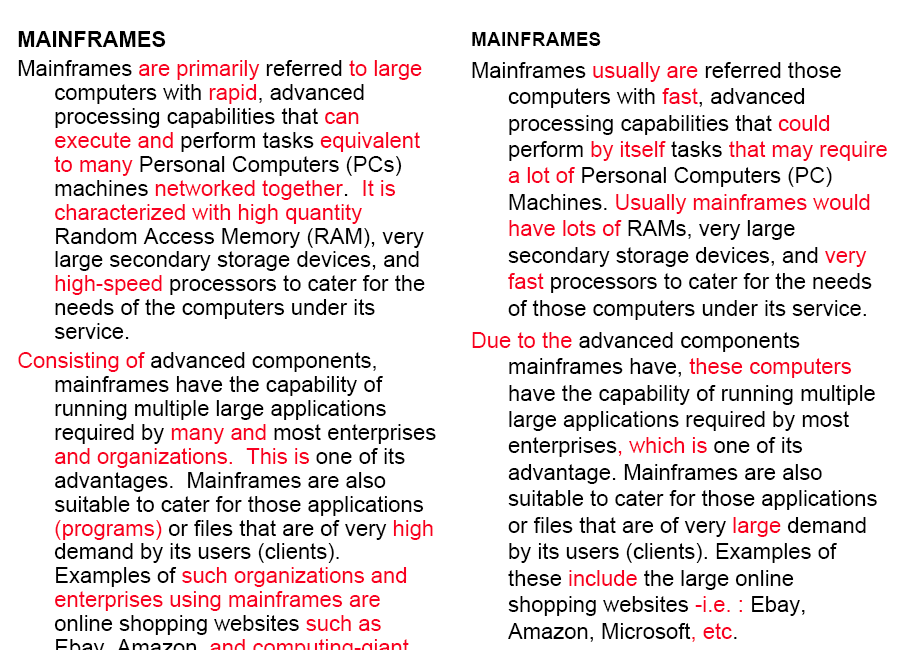

## Intuition of distributional word similarity

### Nida example:

    A bottle of tesgüino is on the table
    Everybody likes tesgüino
    Tesgüino makes you drunk
    We make tesgüino out of corn.

- From context words humans can guess `tesgüino` means

      an alcoholic beverage like beer

- Intuition for algorithm: 

      Two words are similar if they have similar word contexts.

### Embedding

Model the meaning of a word by “embedding” in a vector space.

- The meaning of a word is a vector of numbers

- Vector models are also called “embeddings”.

- **Contrast**: word meaning is represented in many computational linguistic applications by a vocabulary index (“word number 545”)

### Term-document matrix

- Each cell: count of term $t$ in a document $d$:  $tf_{t,d}$: 
- Each document is a count vector: a column in the matrix 

- Two documents are similar if their column vectors are similar
- Two words are similar if their row vectors are similar

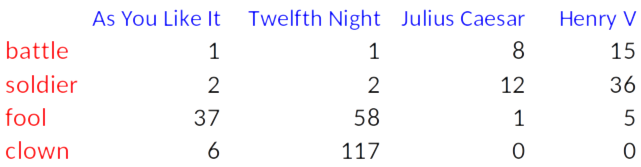

## Word2vec

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.[1]

Word2vec was created by a team of researchers led by Tomas Mikolov at Google. The algorithm has been subsequently analysed and explained by other researchers. Embedding vectors created using the Word2vec algorithm have many advantages compared to earlier algorithms[1] such as latent semantic analysis.